<a href="https://colab.research.google.com/github/phigratio/Machine-Learning/blob/main/PandasAdvanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# courses=pd.read_csv('/content/courses.csv')
# students=pd.read_csv('/content/students.csv')
# nov=pd.read_csv('/content/reg-month1.csv')
# dec=pd.read_csv('/content/reg-month2.csv')


# matches=pd.read_csv('/content/matches.csv')
# delivery=pd.read_csv('/content/deliveries.csv')

In [ ]:
regis=pd.concat([nov,dec],ignore_index=True)
regis

In [ ]:
multi=pd.concat([nov,dec],keys=['Nov','Dec'])
# MultiIndex Dataframe
multi.loc[('Dec',4)]

In [ ]:
pd.concat([nov,dec],axis=1)

In [ ]:
#Inner Join
students.merge(regis,how='inner',on='student_id')

In [ ]:
#Left join
students.merge(regis,how='left',on='student_id')

In [ ]:
#Right Join
students.merge(regis,how='right',on='student_id')

In [ ]:
#Outer Join
students.merge(regis,how='outer',on='student_id')

In [ ]:
#find the total revenue generated
regis.merge(courses,how='inner',on='course_id')['price'].sum()

In [ ]:
#find month by month revenue
temp_df=pd.concat([nov,dec],keys=['Nov','Dec']).reset_index()
temp_df.merge(courses,how='inner',on='course_id').groupby('level_0')['price'].sum()

In [ ]:
#Print the registration table
half_df=regis.merge(students,how='inner',on='student_id')
half_df.merge(courses,how='inner',on='course_id')[['name','course_name','price']]

In [ ]:
#Plot bar chart for revenue/course
regis.merge(courses,how='inner',on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

In [ ]:
#find students who enrolled in both the months
temp_df=nov.merge(dec,how='inner',on='student_id')
temp_df.merge(students,how='inner',on='student_id')[['name','student_id']]

In [ ]:
# find course with no enrollment
tmp=regis.merge(courses,how='right',on='course_id')
tmp=tmp[pd.isnull(tmp['student_id'])]
tmp['course_name']

In [ ]:
#find students with no enrollment
tmp=regis.merge(students,how='right',on='student_id')
tmp=tmp[pd.isnull(tmp['course_id'])]
tmp['name']

In [ ]:
students.merge(students,how='inner',left_on='partner',right_on='student_id')[['name_x','name_y']]

In [ ]:
#top 3 students with most enrollment
regis.merge(students,how='inner',on='student_id').groupby(['name','student_id'])['course_id'].count().sort_values(ascending=False).head(3)

In [ ]:
minor=pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
major=pd.read_csv('/content/time_series_covid19_deaths_global.csv')

In [ ]:
#Can we have multiple index
index_val=[('cse',2019),('cse',2020),('cse',2021),('eee',2019),('eee',2020),('eee',2021)]
a=pd.Series([1,2,3,4,5,6],index=index_val)


In [ ]:
a['cse',2019]

1

In [ ]:
index_val=[('cse',2019),('cse',2020),('cse',2021),('eee',2019),('eee',2020),('eee',2021)]
multiIndex=pd.MultiIndex.from_tuples(index_val)
multiIndex.levels[1]

Index([2019, 2020, 2021], dtype='int64')

In [ ]:
multiIndex=pd.MultiIndex.from_product([['cse','eee'],[2019,2020,2021,2022]])

In [ ]:
s=pd.Series([1,2,3,4,5,6,7,8],index=multiIndex)

In [ ]:
#how to fetch items from such a series
s['cse']

,0
2019,1
2020,2
2021,3
2022,4


In [ ]:
  # unstack
  temp=s.unstack()
  temp

,2019,2020,2021,2022
cse,1,2,3,4
eee,5,6,7,8


In [ ]:
# stack
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
eee  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [ ]:
#MulitIndex Dataframe
branch_df1=pd.DataFrame(
    [
      [1,2],
      [3,4],
      [5,6],
      [7,8],
      [9,10],
      [11,12],
      [13,14],
      [15,16],
    ],
  index=multiIndex,
  columns=['stud','avg']
)
branch_df1

stud  avg
cse 2019     1    2
    2020     3    4
    2021     5    6
    2022     7    8
eee 2019     9   10
    2020    11   12
    2021    13   14
    2022    15   16

In [ ]:
branch_df1['avg']

cse  2019     2
     2020     4
     2021     6
     2022     8
eee  2019    10
     2020    12
     2021    14
     2022    16
Name: avg, dtype: int64

In [ ]:
branch_df1.loc['cse']

,stud,avg
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [ ]:
#MulitIndex Dataframe
branch_df2=pd.DataFrame(
    [
      [1,2,0,1],
      [3,4,0,1],
      [5,6,0,1],
      [7,8,0,1],
      [9,10,0,1],
      [11,12,0,1],
      [13,14,0,1],
      [15,16,0,1],
    ],
  index=multiIndex,
  columns=pd.MultiIndex.from_product([['stud','avg'],['dhaka','sylhet']])
)
branch_df2

stud          avg       
         dhaka sylhet dhaka sylhet
cse 2019     1      2     0      1
    2020     3      4     0      1
    2021     5      6     0      1
    2022     7      8     0      1
eee 2019     9     10     0      1
    2020    11     12     0      1
    2021    13     14     0      1
    2022    15     16     0      1

In [ ]:
branch_df1.unstack()

stud                 avg               
    2019 2020 2021 2022 2019 2020 2021 2022
cse    1    3    5    7    2    4    6    8
eee    9   11   13   15   10   12   14   16

In [ ]:
branch_df2.unstack().unstack()

stud  dhaka   2019  cse     1
                    eee     9
              2020  cse     3
                    eee    11
              2021  cse     5
                    eee    13
              2022  cse     7
                    eee    15
      sylhet  2019  cse     2
                    eee    10
              2020  cse     4
                    eee    12
              2021  cse     6
                    eee    14
              2022  cse     8
                    eee    16
avg   dhaka   2019  cse     0
                    eee     0
              2020  cse     0
                    eee     0
              2021  cse     0
                    eee     0
              2022  cse     0
                    eee     0
      sylhet  2019  cse     1
                    eee     1
              2020  cse     1
                    eee     1
              2021  cse     1
                    eee     1
              2022  cse     1
                    eee     1
dtype: int64

In [ ]:
#Extracing  rows single
branch_df2.loc['cse',2019]

stud  dhaka     1
      sylhet    2
avg   dhaka     0
      sylhet    1
Name: (cse, 2019), dtype: int64

In [ ]:
branch_df2.loc[('cse',2019):('ece',2022):2]

stud          avg       
         dhaka sylhet dhaka sylhet
cse 2019     1      2     0      1
    2021     5      6     0      1

In [ ]:
major.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [ ]:
minor.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [ ]:
major.melt(id_vars=['Province/State','Country/Region'])

,Province/State,Country/Region,variable,value
0,NaN,Afghanistan,Lat,33.93911
1,NaN,Albania,Lat,41.15330
2,NaN,Algeria,Lat,28.03390
3,NaN,Andorra,Lat,42.50630
4,NaN,Angola,Lat,-11.20270
...,...,...,...,...
311826,NaN,West Bank and Gaza,1/2/23,5708.00000
311827,NaN,Winter Olympics 2022,1/2/23,0.00000
311828,NaN,Yemen,1/2/23,2159.00000
311829,NaN,Zambia,1/2/23,4024.00000


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.groupby('sex')[['total_bill']].mean()

<ipython-input-3-f44286c1a160>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [5]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

<ipython-input-5-19160ad1a132>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [6]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='mean')

<ipython-input-6-022fe8469cb5>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='mean')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [11]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill',aggfunc='mean')

<ipython-input-11-e81121c1d44e>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill',aggfunc='mean')


day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [13]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True,observed=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [14]:
#Plotting graphs
expense=pd.read_csv('/content/expense_data.csv')
expense

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [15]:
expense['Date']=pd.to_datetime(expense['Date'])

In [16]:
expense['Month']=expense['Date'].dt.month_name()

<Axes: xlabel='Month'>

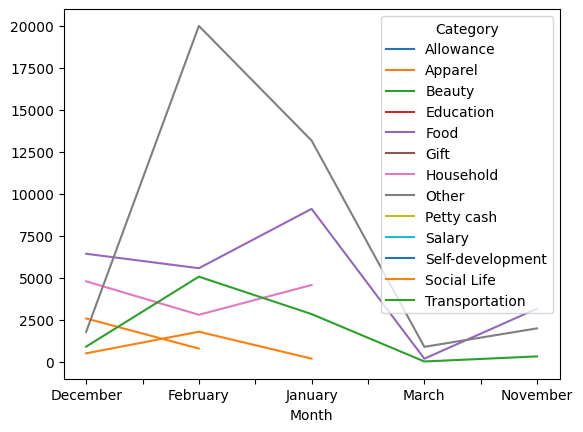

In [19]:
expense.pivot_table(index='Month',columns='Category',values='INR',aggfunc='sum').plot()

<Axes: xlabel='Month'>

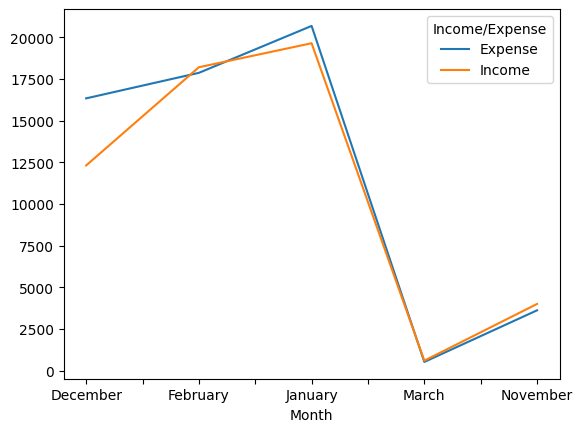

In [20]:
expense.pivot_table(index='Month',columns='Income/Expense',values='INR',aggfunc='sum').plot()

In [22]:
a=np.array([1,2,3,4])
a*4

array([ 4,  8, 12, 16])

In [24]:
s=pd.Series(['cat','mat',None,'rat'])
s.str.startswith('c')

,0
0,True
1,False
2,None
3,False


In [26]:
titanic=pd.read_csv('/content/titanic.csv')

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
titanic['Name'].str.lower()
titanic['Name'].str.upper()
titanic['Name'].str.title()
titanic['Name'].str.len()

,Name
0,23
1,51
2,22
3,44
4,24
...,...
886,21
887,28
888,40
889,21


In [31]:
#strip
"    muqtadir   ".strip()

'muqtadir'

In [32]:
titanic['Name'].str.strip()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [33]:
titanic['lastName']=titanic['Name'].str.split(',').str.get(0)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings


In [ ]:
#TimeStamp Object
